# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
# df = pd.read_csv("craftcans.csv")
df = pd.read_csv("craftcans.csv", na_values=["Does not apply"])
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [3]:
df.shape

(2416, 7)

In [4]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [5]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
SanTan Brewing Company        19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [6]:
df.ABV.value_counts().head(1)

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [92]:
df.ABV

0        4.5
1        4.9
2        4.8
3        6.0
4        6.0
5        5.6
6        8.0
7       12.5
8        7.7
9        4.2
10       5.0
11       6.6
12       4.0
13       5.5
14       7.6
15       5.1
16       6.5
17       6.0
18       5.0
19       5.2
20       4.8
21       7.2
22       6.7
23       4.9
24       8.0
25       7.5
26       6.0
27       8.0
28       6.3
29       5.8
        ... 
2386     5.7
2387     6.2
2388     4.9
2389     9.9
2390     6.2
2391     5.8
2392     5.2
2393     8.5
2394     7.0
2395     5.3
2396     5.6
2397     4.9
2398     5.1
2399     4.0
2400     5.5
2401     5.1
2402     5.1
2403     9.7
2404     5.1
2405     6.7
2406     6.2
2407     8.3
2408     7.0
2409     4.9
2410     9.9
2411     5.3
2412     9.9
2413     8.0
2414     8.7
2415     6.5
Name: ABV, Length: 2416, dtype: float64

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [97]:
# I THINK THIS WORKED BEFORE I STARTED MESSING WITH COMMANDS OUT OF ORDER IN THE NOTEBOOK
df['ABV'] = df.ABV.str.replace("%", "")

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [9]:
df['ABV'] = df.ABV.astype(float)
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [10]:
df.ABV.mean()

5.977342419080068

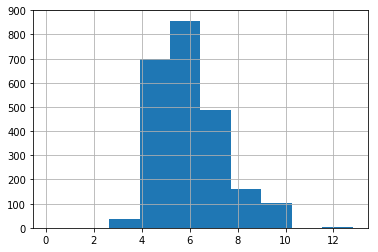

In [96]:
%matplotlib inline
df.ABV.hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [12]:
df.ABV.isnull().value_counts()

False    2348
True       68
Name: ABV, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [13]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [14]:
df[df.Location == "Brooklyn, NY"]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [15]:
# first did with variable but liked other way better for now
# Brooklyn_beer = df[df.Location == "Brooklyn, NY"]
# Brooklyn_beer.Brewery.value_counts()
df[df.Location == "Brooklyn, NY"].Brewery.value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [16]:
df[df.Brewery == "Sixpoint Craft Ales"].Style.value_counts().head()

American IPA                      4
Rye Beer                          2
Cream Ale                         2
American Double / Imperial IPA    2
Baltic Porter                     2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [17]:
df[df.Location.str.contains("NY", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
598,8 Barrel,Chatham Brewing,"Chatham, NY",American Strong Ale,16 oz.,8.0,69.0
599,Oktoberfest,Chatham Brewing,"Chatham, NY",Märzen / Oktoberfest,16 oz.,5.5,40.0
628,Cream Ale,Newburgh Brewing Company,"Newburgh, NY",Cream Ale,12 oz.,4.2,35.0


### Now *count* all of the breweries in New York state

In [27]:
df[df.Location.str.contains("NY", na=False)].Brewery.nunique()

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [19]:
# I tried adding case=False to both 'or' conditions, but results was same, 959, so took it out
df[df.Style.str.contains("IPA", na=False) | df.Style.str.contains("Pale.*Ale", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.2,42.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [ ]:
# df.IBUs.mean()
# df.IBUs

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [24]:
# df = pd.read_csv("craftcans.csv", na_values=["Does not apply"])
df.IBUs.mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

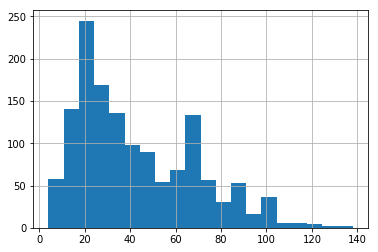

In [29]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [33]:
df.IBUs.describe()
df[df.IBUs > 65].sort_values(by="IBUs")

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2125,Great Crescent Stout,Great Crescent Brewery,"Aurora, IN",English Stout,16 oz.,8.0,66.0
1259,Laughing Dog IPA,Laughing Dog Brewing Company,"Ponderay, ID",American IPA,12 oz.,6.4,66.0
1394,5 Day IPA,O'Fallon Brewery,"O'Fallon, MO",American IPA,12 oz.,6.1,66.0
805,Saint Archer IPA,Saint Archer Brewery,"San Diego, CA",American IPA,12 oz.,6.8,66.0
248,Mission IPA,Mission Brewery,"San Diego, CA",American IPA,32 oz.,6.8,66.0
239,Self Starter,Warped Wing Brewing Company,"Dayton, OH",American IPA,16 oz.,5.2,67.0
1999,Independence Pass Ale,Aspen Brewing Company,"Aspen, CO",American IPA,12 oz.,7.0,67.0
812,Supergoose IPA,Hale's Ales,"Seattle, WA",American IPA,12 oz.,6.9,67.0
393,The Power of Zeus,High Hops Brewery,"Windsor, CO",American Pale Ale (APA),12 oz.,7.0,68.0
2130,Flyin' HI.P.Hay,Maui Brewing Company,"Lahaina, HI",American IPA,12 oz.,6.8,68.0


## List all of the beers with IBUs below the 25th percentile

In [37]:
df[df.IBUs < 22].sort_values(by="IBUs")

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1860,Summer Solstice Cerveza Crema (2009),Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0
2339,Summer Solstice (2011),Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0
1303,Summer Solstice,Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0
1903,Devils Tramping Ground Tripel,Aviator Brewing Company,"Fuquay-Varina, NC",Tripel,12 oz.,9.2,5.0
169,Yo Soy Un Berliner,Freetail Brewing Company,"San Antonio, TX",Berliner Weissbier,12 oz.,4.4,5.0
318,18th Anniversary Gose,Real Ale Brewing Company,"Blanco, TX",Gose,12 oz.,4.4,5.0
1061,Chickawawa Lemonale,Great River Brewery,"Davenport, IA",Fruit / Vegetable Beer,12 oz.,5.0,5.0
1340,Westbrook Gose,Westbrook Brewing Company,"Mt. Pleasant, SC",Gose,12 oz.,4.0,5.0
2064,Winter Solstice,Anderson Valley Brewing Company,"Boonville, CA",Winter Warmer,12 oz.,6.9,6.0
313,Mr. Blue Sky,Griffin Claw Brewing Company,"Birmingham, MI",American Pale Wheat Ale,16 oz.,4.5,6.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

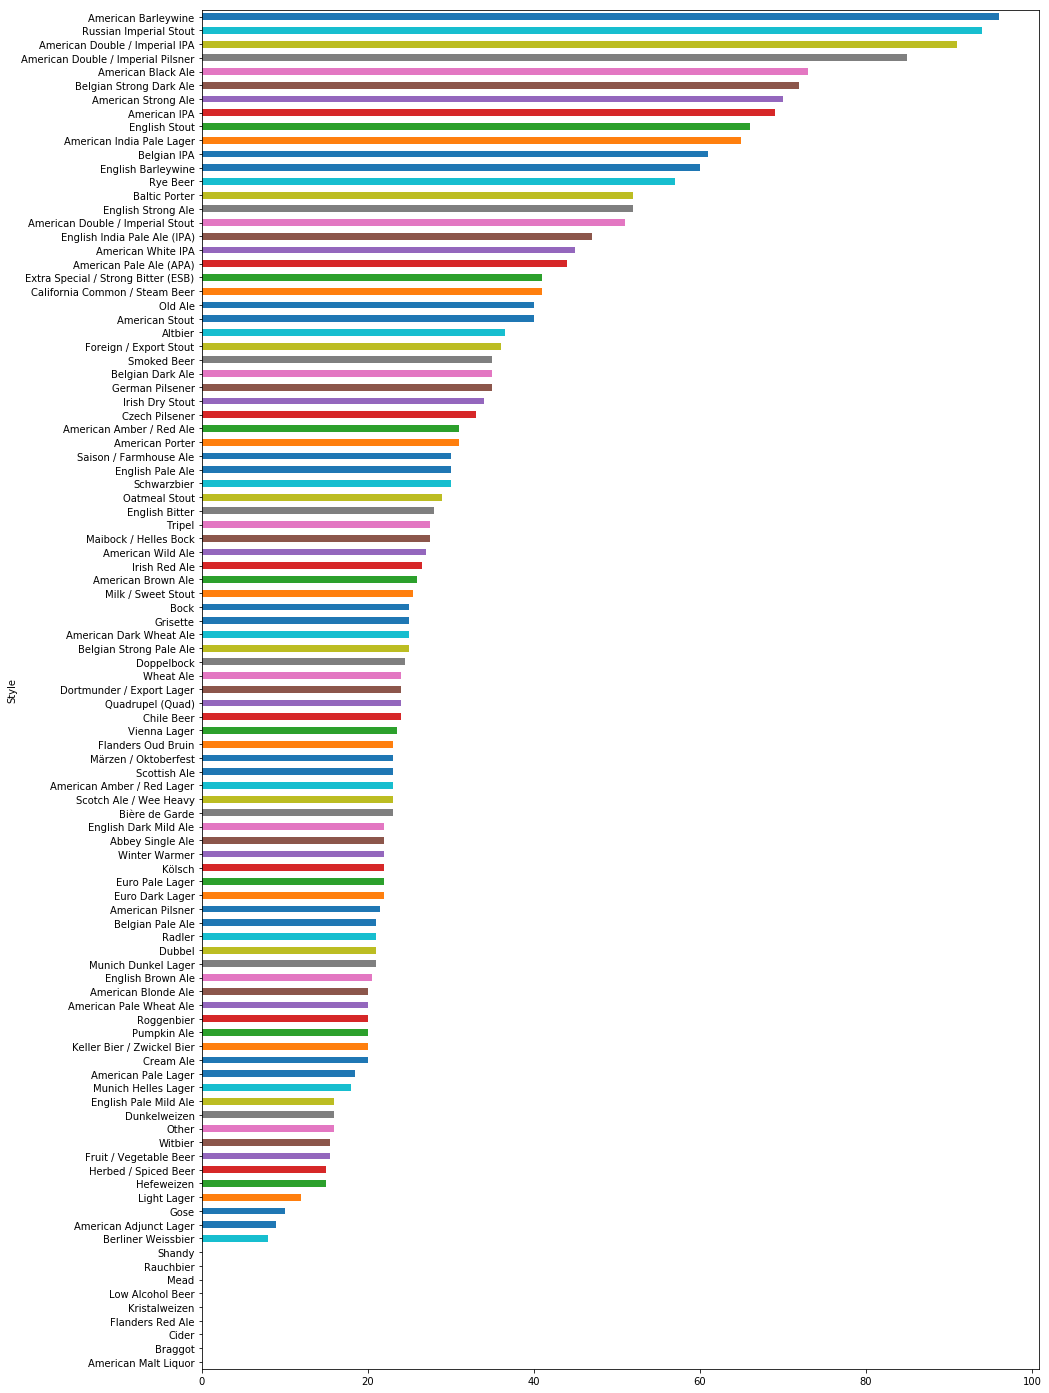

In [74]:
df.groupby('Style').IBUs.median().sort_values(ascending=True, na_position='first').plot(kind='barh', figsize=(15,25))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [56]:
# 5 most common styles of high-IBU beer
df[df.IBUs > 65].Style.value_counts().head()

American IPA                      165
American Double / Imperial IPA     72
American Black Ale                 12
American Strong Ale                 9
Russian Imperial Stout              7
Name: Style, dtype: int64

In [57]:
# 5 most common styles of low-IBU beer
df[df.IBUs < 22].Style.value_counts().head()

American Pale Wheat Ale    44
American Blonde Ale        40
Fruit / Vegetable Beer     29
Hefeweizen                 21
Witbier                    21
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [62]:
df[df.Style.isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].IBUs.mean()


18.982142857142858

## Draw a histogram of the IBUs of those beers

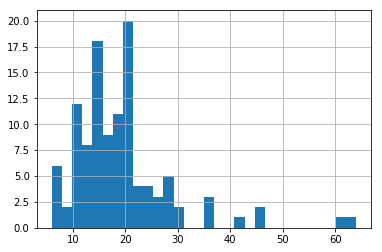

In [64]:
df[df.Style.isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].IBUs.hist(bins=30)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [79]:
df[df.Style.str.contains("IPA", na=False)].IBUs.mean()

71.94897959183673

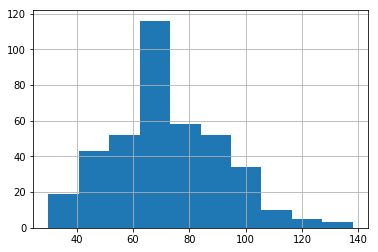

In [82]:
df[df.Style.str.contains("IPA", na=False)].IBUs.hist()

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

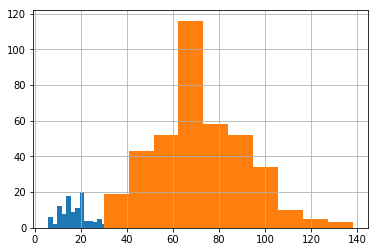

In [83]:
# I tried switching which histogram is the variable -- obs i can see the difference, but i don't 
#understand how to make it better/more meaningful
ax = df[df.Style.isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].IBUs.hist(bins=30)
df[df.Style.str.contains("IPA", na=False)].IBUs.hist(ax=ax)

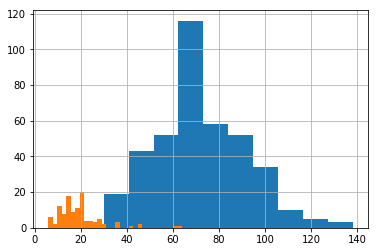

In [84]:
ax = df[df.Style.str.contains("IPA", na=False)].IBUs.hist()
df[df.Style.isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].IBUs.hist(bins=30, ax=ax)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [99]:
wheat_beer_abv = df[df.Style.isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].ABV.mean()
wheat_beer_abv

5.043715846994536

In [98]:
ipa_abv = df[df.Style.str.contains("IPA", na=False)].ABV.mean()
ipa_abv

6.879285714285714

## Good work!

If you made it this far you deserve a drink.